In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [2]:
th232_chain = pd.read_csv("SNOLAB-shotcrete-inputs/homogenous/Th232-chain-shotcrete-abb-summary.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (th232_chain.head(10))


   Energy           a,n          S.F.         Total
0     0.0  3.100000e-13  5.910000e-16  3.106000e-13
1     0.1  6.914000e-13  1.040000e-15  6.925000e-13
2     0.2  9.225000e-13  1.285000e-15  9.238000e-13
3     0.3  1.158000e-12  1.445000e-15  1.159000e-12
4     0.4  1.333000e-12  1.548000e-15  1.335000e-12
5     0.5  1.483000e-12  1.611000e-15  1.484000e-12
6     0.6  1.556000e-12  1.643000e-15  1.558000e-12
7     0.8  1.585000e-12  1.637000e-15  1.586000e-12
8     0.9  1.601000e-12  1.608000e-15  1.603000e-12
9     1.0  1.582000e-12  1.567000e-15  1.583000e-12


In [3]:
th232_only = pd.read_csv("SNOLAB-shotcrete-inputs/homogenous/Th232-only-shotcrete-abb-summary.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (th232_only.head(10))

   Energy           a,n          S.F.         Total
0     0.0  4.693000e-15  5.910000e-16  5.284000e-15
1     0.1  7.125000e-15  1.040000e-15  8.165000e-15
2     0.2  8.730000e-15  1.285000e-15  1.001000e-14
3     0.3  9.082000e-15  1.445000e-15  1.053000e-14
4     0.4  1.116000e-14  1.548000e-15  1.271000e-14
5     0.5  1.283000e-14  1.611000e-15  1.445000e-14
6     0.6  1.272000e-14  1.643000e-15  1.436000e-14
7     0.8  1.086000e-14  1.637000e-15  1.250000e-14
8     0.9  9.719000e-15  1.608000e-15  1.133000e-14
9     1.0  9.631000e-15  1.567000e-15  1.120000e-14


In [4]:
th232_hang = pd.read_csv("SNOLAB-shotcrete-inputs/homogenous/Hang_S4_Th.txt", skiprows=1, engine='python', names=['Energy','Total'], \
                         delim_whitespace=False)
print (th232_hang.head(10))

   Energy         Total
0  0.0161  1.612900e-09
1  0.0241  1.612800e-09
2  0.0241  1.601300e-09
3  0.0241  1.589800e-09
4  0.0241  1.578300e-09
5  0.0241  1.566800e-09
6  0.0241  1.555200e-09
7  0.0241  1.543700e-09
8  0.0241  1.532200e-09
9  0.0161  1.532200e-09


In [5]:
th232chainEn = np.asarray(th232_chain['Energy'],dtype=float)
th232chainRn = np.asarray(th232_chain['Total'],dtype=float)
th232chainANRn = np.asarray(th232_chain['a,n'],dtype=float)
th232onlyRn = np.asarray(th232_only['Total'],dtype=float)
th232onlyANRn = np.asarray(th232_only['a,n'],dtype=float)
th232hangEn = np.asarray(th232_hang['Energy'],dtype=float)
th232hangRn = np.asarray(th232_hang['Total'],dtype=float)



print(np.shape(th232chainEn))
print(np.shape(th232chainRn))

(87,)
(87,)


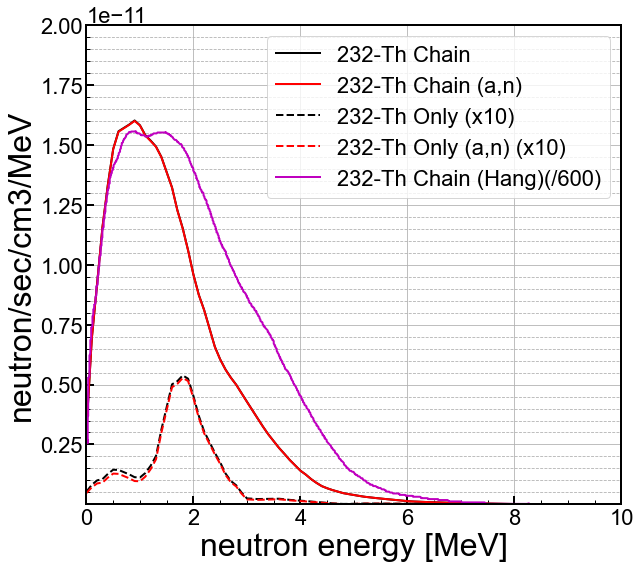

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

width=np.diff(th232chainEn)[0]



ax1.plot(th232chainEn, th232chainRn/width,color='k',linestyle='-',label="232-Th Chain")
ax1.plot(th232chainEn, th232chainANRn/width,color='r',linestyle='-',label="232-Th Chain (a,n)")
ax1.plot(th232chainEn, 10*th232onlyRn/width,color='k',linestyle='--',label="232-Th Only (x10)")
ax1.plot(th232chainEn, 10*th232onlyANRn/width,color='r',linestyle='--',label="232-Th Only (a,n) (x10)")
ax1.plot(th232hangEn, th232hangRn/600,color='m',linestyle='-',label="232-Th Chain (Hang)(/600)")


#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-15
ymax = 2e-11


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [15]:
u238_chain = pd.read_csv("SNOLAB-shotcrete-inputs/homogenous/U238-chain-shotcrete-abb-summary.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (u238_chain.head(10))

u235_chain = pd.read_csv("SNOLAB-shotcrete-inputs/homogenous/U235-chain-shotcrete-abb-summary.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (u235_chain.head(10))

   Energy           a,n          S.F.         Total
0     0.0  1.120000e-12  5.034000e-11  5.146000e-11
1     0.1  2.422000e-12  8.822000e-11  9.064000e-11
2     0.2  3.315000e-12  1.087000e-10  1.121000e-10
3     0.3  4.300000e-12  1.221000e-10  1.264000e-10
4     0.4  4.967000e-12  1.308000e-10  1.358000e-10
5     0.5  5.337000e-12  1.362000e-10  1.415000e-10
6     0.6  5.366000e-12  1.390000e-10  1.444000e-10
7     0.8  4.968000e-12  1.391000e-10  1.441000e-10
8     0.9  4.734000e-12  1.371000e-10  1.418000e-10
9     1.0  4.656000e-12  1.341000e-10  1.387000e-10
   Energy           a,n          S.F.         Total
0     0.0  3.260000e-14  2.464000e-16  3.285000e-14
1     0.1  7.276000e-14  4.299000e-16  7.319000e-14
2     0.2  9.553000e-14  5.282000e-16  9.606000e-14
3     0.3  1.186000e-13  5.921000e-16  1.192000e-13
4     0.4  1.380000e-13  6.345000e-16  1.387000e-13
5     0.5  1.528000e-13  6.615000e-16  1.534000e-13
6     0.6  1.588000e-13  6.770000e-16  1.594000e-13
7     0.8  1

In [18]:
u238chainEn = np.asarray(u238_chain['Energy'],dtype=float)
u238chainRn = np.asarray(u238_chain['Total'],dtype=float)
u238chainANRn = np.asarray(u238_chain['a,n'],dtype=float)
u238chainSFRn = np.asarray(u238_chain['S.F.'],dtype=float)




print(np.shape(u238chainEn))
print(np.shape(u238chainRn))

(87,)
(87,)


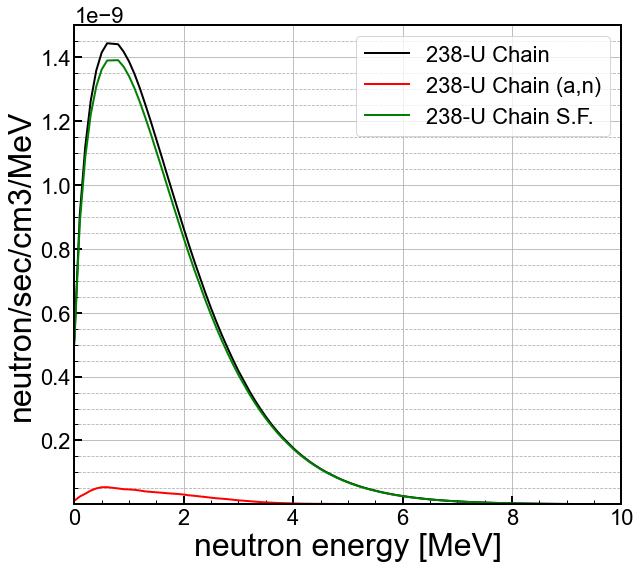

In [20]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

width=np.diff(u238chainEn)[0]



ax1.plot(u238chainEn, u238chainRn/width,color='k',linestyle='-',label="238-U Chain")
ax1.plot(u238chainEn, u238chainANRn/width,color='r',linestyle='-',label="238-U Chain (a,n)")
ax1.plot(u238chainEn, u238chainSFRn/width,color='g',linestyle='-',label="238-U Chain S.F.")



#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-14
ymax = 1.5e-9


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()